In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
import networkx as nx
import queue
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [29]:
# Helper functions to work with the Island

def printBinaryGame(thunt):
    ''' Display the island corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Simple print of the corresponding island
    '''
    (height, width) = thunt.shape
    
    print()
    for i in range(height):
        for j in range(width):
            if thunt[i,j] == 1:
                print("\u25a9", end = " ")   # use some other character if the unicode does not print properly
            elif thunt[i,j] == 0:
                print(".", end = " ")
        print()
        

def showBinaryGame(thunt):
    ''' Display the island corresponding to a binary grid
        Input : 2D NumPy array with 0 and 1 as elements
        Output : Heatmap grid of the corresponding island
    '''
    (height, width) = thunt.shape
    thunt = thunt * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    colors = ['white', 'deepskyblue']
    cmap = mcolors.ListedColormap(colors)
    f = plt.figure(figsize = (width,height))
    heatmap(thunt, vmin = 0, vmax = 255, cmap = cmap, linewidths=.5, linecolor='black',cbar = False)

# Visualize using seaborn
    #sns.heatmap(thunt, cmap='Blues', annot=True, fmt='d', linewidths=.5, linecolor='black')
    #plt.title('Customized Binary Table', fontsize=16)  # Set title
    #plt.tight_layout()  # Adjust layout for better spacing
    #plt.show()
    
    
def showBinaryGameProblem(thunt, start, goal):
    ''' Display the island corresponding to a binary grid
        Display "start" and "goal" position on the grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinate of the "start" and "goal"
        Output : Heatmap grid of the island with markers
    '''
    (height, width) = thunt.shape
    thunt = thunt * 255
    
    # Modify the start and goal positions with specific values for icons
    thunt[start[0], start[1]] = 200  # Using 200 for human icon
    thunt[goal[0], goal[1]] = 200    # Using 100 for block icon
    
    # Define custom colormap
    colors = ['white','deepskyblue']  # Black, White, Gray, Red, Blue
    cmap = mcolors.ListedColormap(colors)

    # Plot the heatmap with custom colormap
    f = plt.figure(figsize=(width, height))
    heatmap(thunt, cmap=cmap, vmin=0, vmax=255,linewidths=.5, linecolor='black',cbar = False)
    
    # Overlay icons for start and goal points
    # Overlay icons for start and goal points
    human_icon_path = 'human_icon.png'
    block_icon_path = 'block_icon.png'
    
    
    human_icon = OffsetImage(plt.imread(human_icon_path), zoom=0.07)
    block_icon = OffsetImage(plt.imread(block_icon_path), zoom=0.07)
    
    human_ab = AnnotationBbox(human_icon, (start[1] + 0.5, start[0] + 0.5),frameon=False)
    block_ab = AnnotationBbox(block_icon, (goal[1] + 0.5, goal[0] + 0.5),frameon=False)
    
    plt.gca().add_artist(human_ab)
    plt.gca().add_artist(block_ab)
    

In [51]:
# Create the Island
# 0 : empty cell, reachable within a path
# 1 : blocked cell or wall, not reachable

thunt = [[0, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 0, 0]]


# Convert to a NumPy array
thunt = np.array(thunt)

# Print the island using helper functions
print("Treasure hunting's dimensions", thunt.shape)
printBinaryGame(thunt)

Treasure hunting's dimensions (6, 6)

. . . . . ▩ 
. ▩ . ▩ . . 
. . ▩ . . . 
▩ . . ▩ ▩ . 
▩ . . . ▩ . 
▩ . ▩ . . . 


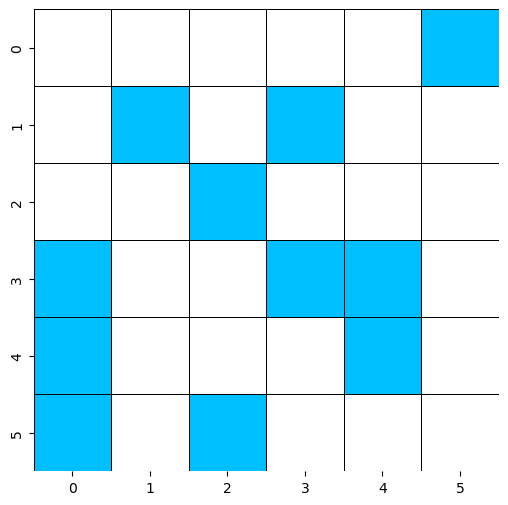

In [52]:
showBinaryGame(thunt)

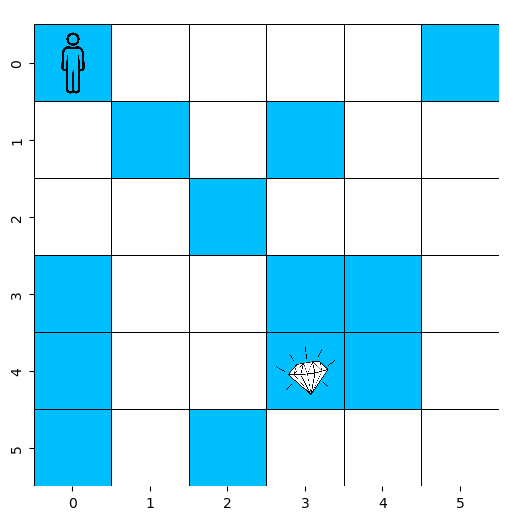

In [53]:
START = (0,0)
GOAL = (4,3)

# Show the island using helper functions
showBinaryGameProblem(thunt, START, GOAL)

In [54]:
# Create a Graph class
class IslandGraph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
        return self.edges[node]    

In [55]:
# Function to convert a island to a graph
def island_to_graph(islandGrid):
    ''' Converts a 2D binary island to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : IslandGraph corresponding to input island
    '''
    islandGraph = IslandGraph()
    (height, width) = islandGrid.shape
    
    for i in range(height):
        for j in range(width):
            
            # Only consider blank cells as nodes
            if islandGrid[i,j] == 0:
                
                neighbors = []
                
                # Adjacent cell : Top
                if (i > 0) and islandGrid[i-1,j] == 0:
                    neighbors.append(((i-1,j), 1))
                    
                # Adjacent cell : Left                
                if (j > 0) and islandGrid[i,j-1] == 0:
                    neighbors.append(((i,j-1), 1))
                    
                # Adjacent cell : Bottom                    
                if (i < height - 1) and islandGrid[i+1,j] == 0:
                    neighbors.append(((i+1,j), 1))

                # Adjacent cell : Right                    
                if (j < width - 1) and islandGrid[i,j+1] == 0:
                    neighbors.append(((i,j+1), 1))

                # Insert edges in the graph
                if len(neighbors) > 0:
                    islandGraph.edges[(i,j)] = neighbors

    return islandGraph

In [56]:
# Convert the island to a graph
islandgraph = island_to_graph(thunt)

# Print the edges with weights
islandgraph.all_edges()

{(0, 0): [((1, 0), 1), ((0, 1), 1)],
 (0, 1): [((0, 0), 1), ((0, 2), 1)],
 (0, 2): [((0, 1), 1), ((1, 2), 1), ((0, 3), 1)],
 (0, 3): [((0, 2), 1), ((0, 4), 1)],
 (0, 4): [((0, 3), 1), ((1, 4), 1)],
 (1, 0): [((0, 0), 1), ((2, 0), 1)],
 (1, 2): [((0, 2), 1)],
 (1, 4): [((0, 4), 1), ((2, 4), 1), ((1, 5), 1)],
 (1, 5): [((1, 4), 1), ((2, 5), 1)],
 (2, 0): [((1, 0), 1), ((2, 1), 1)],
 (2, 1): [((2, 0), 1), ((3, 1), 1)],
 (2, 3): [((2, 4), 1)],
 (2, 4): [((1, 4), 1), ((2, 3), 1), ((2, 5), 1)],
 (2, 5): [((1, 5), 1), ((2, 4), 1), ((3, 5), 1)],
 (3, 1): [((2, 1), 1), ((4, 1), 1), ((3, 2), 1)],
 (3, 2): [((3, 1), 1), ((4, 2), 1)],
 (3, 5): [((2, 5), 1), ((4, 5), 1)],
 (4, 1): [((3, 1), 1), ((5, 1), 1), ((4, 2), 1)],
 (4, 2): [((3, 2), 1), ((4, 1), 1), ((4, 3), 1)],
 (4, 3): [((4, 2), 1), ((5, 3), 1)],
 (4, 5): [((3, 5), 1), ((5, 5), 1)],
 (5, 1): [((4, 1), 1)],
 (5, 3): [((4, 3), 1), ((5, 4), 1)],
 (5, 4): [((5, 3), 1), ((5, 5), 1)],
 (5, 5): [((4, 5), 1), ((5, 4), 1)]}

In [57]:
def showBinaryIslandGraph(islandGraph):
    ''' Display a graph using networkx
        Input : IslandGraph from 2D island
        Output : Input graph displayed
    '''
    edgeDict = islandGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 2)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()

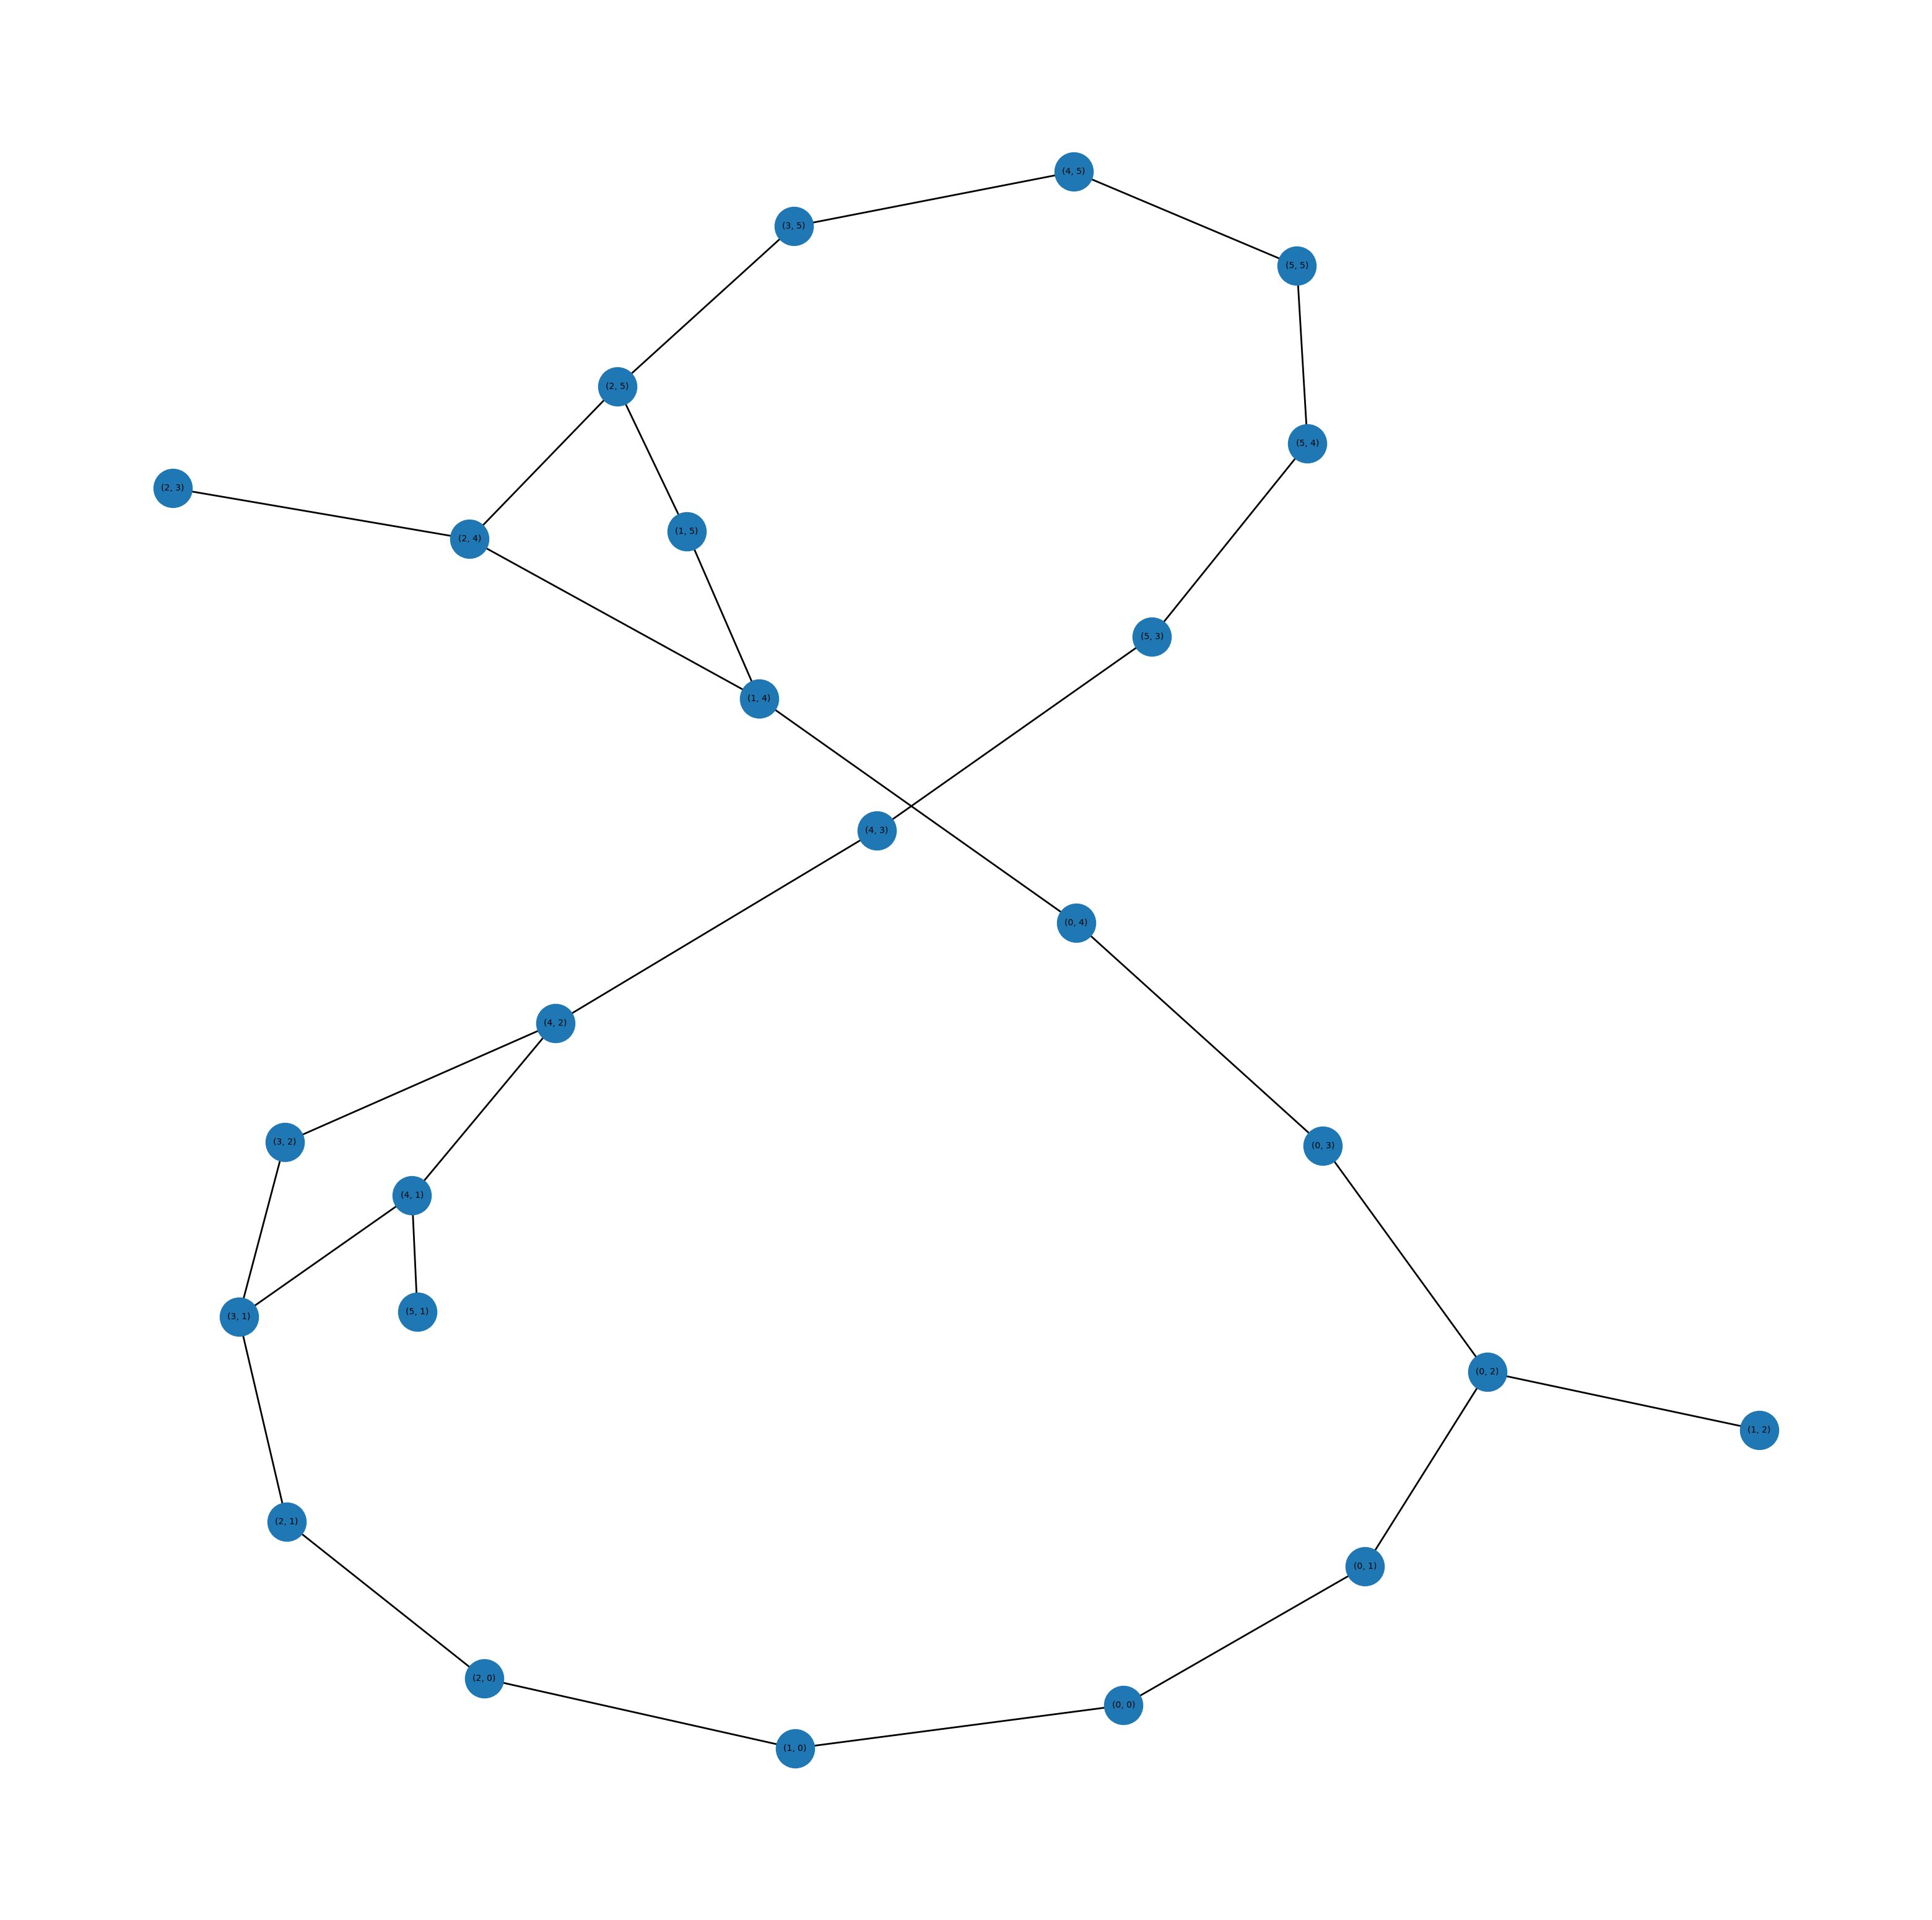

In [58]:
# Show the graph using helper functions
# The layout may change every time you run this cell
# However, the graph (nodes, edges) remains the same

showBinaryIslandGraph(islandgraph)

In [59]:
# Helper functions to work with the Island with Path

def showBinaryIslandPath(islandGrid, islandPath):
    ''' Display the island corresponding to a binary grid
        Display path(s) superimposed on the binary grid 
        Input : 2D NumPy array with 0 and 1 as elements
        Input : 2D coordinates of the paths on the island
        Output : Heatmap grid of the island with the path
    '''
    (height, width) = islandGrid.shape
    islandGrid = islandGrid * 255                # just to match standard pixel values (0 to 255) in grayscale
    
    for node in islandPath:
        islandGrid[node[0], node[1]] = 128     # half level of grayscale (0 to 255) to highlight the path
    
    f = plt.figure(figsize = (width,height))
    heatmap(islandGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

### Breadth-First-Search (BFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [60]:
# Breadth-First-Search (BFS) with FIFO Queue

def breadth_first_search(islandGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in islandGraph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Breadth-First-Search (BFS)

Total nodes in island : 25
Total nodes visited : 18  |  72.0 %
Final path distance : 8

Path through the Island : [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3)]


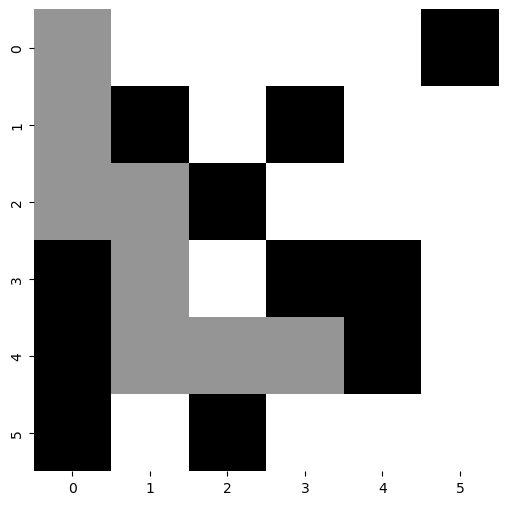

In [61]:
# Define start and goal positions
START = (0,0)
GOAL = (4,3)

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(islandgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print()

totalNodes = np.count_nonzero(thunt == 0)
print("Total nodes in island :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Island :", path)
showBinaryIslandPath(thunt,path)

### Depth-First-Search (DFS)

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [62]:
# Depth-First-Search (DFS) with LIFO Queue

def depth_first_search(islandGraph, start, goal):
    ''' Function to perform DFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # LIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in islandGraph.neighbors(currentNode):
            
            # ignore if it has already been explored
            if nextNode not in explored:
                
                # put new node in frontier
                frontier.put(nextNode)
                
                # assign current node as parent
                explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Depth-First-Search (DFS)

Total nodes in island : 25
Total nodes visited : 14  |  56.0 %
Final path distance : 14

Path through the Island : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (4, 3)]


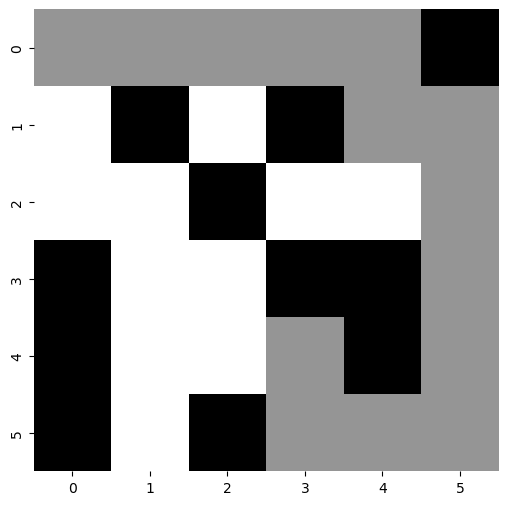

In [63]:
# Define start and goal positions
START = (0,0)
GOAL = (4,3)

# Run the DFS algorithm for path finding
nodesExplored, nodesProcessed = depth_first_search(islandgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS)")
print()

totalNodes = np.count_nonzero(thunt == 0)
print("Total nodes in island :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Island :", path)
showBinaryIslandPath(thunt,path)

### Uniform-Cost-Search (UCS)

**Uninformed Search** : Focusses on the graph structure and the *cost from start*, but not the *distance from goal*.

In [64]:
# Uniform-Cost-Search (UCS) with Priority Queue

def uniform_cost_search(islandGraph, start, goal):
    ''' Function to perform UCS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in islandGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Uniform-Cost-Search (UCS)

Total nodes in island : 25
Total nodes visited : 20  |  80.0 %
Final path distance : 8

Path through the Island : [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3)]


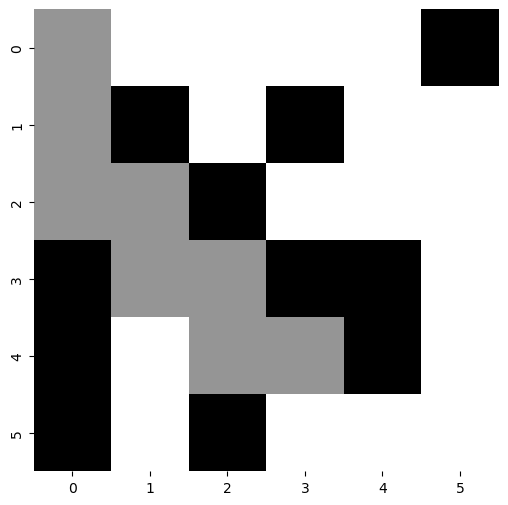

In [65]:
# Define start and goal positions
START = (0,0)
GOAL = (4,3)

# Run the UCS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = uniform_cost_search(islandgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Uniform-Cost-Search (UCS)")
print()

totalNodes = np.count_nonzero(thunt == 0)
print("Total nodes in island :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Island :", path)
showBinaryIslandPath(thunt,path)

### Greedy-Search (GS)

**Informed Search** : Focusses on the graph structure and the *distance from goal*, but not the *cost from start*.

In [66]:
# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# Greedy-Search (GS) with Priority Queue

def greedy_search(islandGraph, start, goal):
    ''' Function to perform GS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
                                # -- 6
                                #    3
                                # -- 3
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in islandGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored
            # cost from start not considered
            if (nextNode not in explored):

                # set priority as distance from goal
                priority = heuristic(nextNode, goal)
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

Greedy-Search (GS)

Total nodes in island : 25
Total nodes visited : 16  |  64.0 %
Final path distance : 14

Path through the Island : [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (4, 3)]


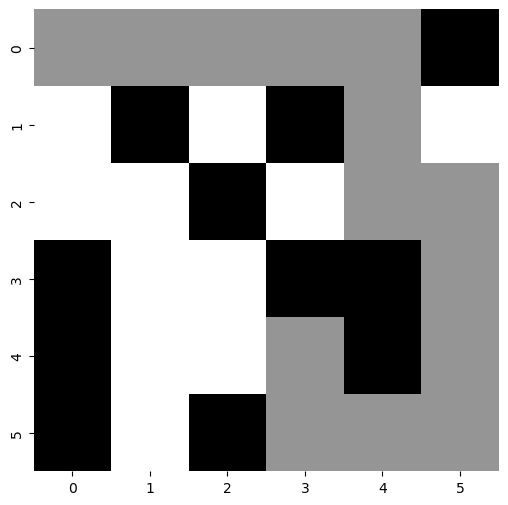

In [67]:
# Define start and goal positions
START = (0,0)
GOAL = (4,3)

# Run the GS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = greedy_search(islandgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Greedy-Search (GS)")
print()

totalNodes = np.count_nonzero(thunt == 0)
print("Total nodes in island :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Island :", path)
showBinaryIslandPath(thunt,path)

### A\*-Search (A\*S)

**Informed Search** : Focusses on the graph structure, the *cost from start* and also the *distance from goal*.

In [68]:
# Heuristic function for Distance

def heuristic(nodeA, nodeB):
    (xA, yA) = nodeA
    (xB, yB) = nodeB
    return abs(xA - xB) + abs(yA - yB)


# A*-Search (A*S) with Priority Queue

def astar_search(islandGraph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in islandGraph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost + distance from goal
                priority = newcost + heuristic(nextNode, goal)
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

A*-Search (A*S)

Total nodes in island : 25
Total nodes visited : 13  |  52.0 %
Final path distance : 8

Path through the Island : [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3)]


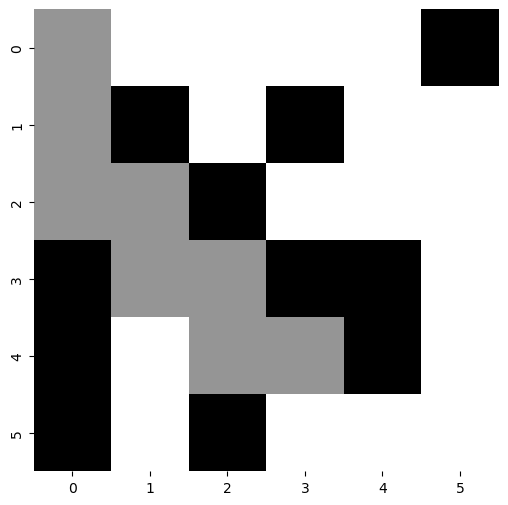

In [69]:
# Define start and goal positions
START = (0,0)
GOAL = (4,3)

# Run the A*S algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = astar_search(islandgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = np.count_nonzero(thunt == 0)
print("Total nodes in island :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path distance :", len(path))
print()

# Print the path and show using helper functions
print("Path through the Island :", path)
showBinaryIslandPath(thunt,path)